In [1]:
import pandas as pd


In [2]:
# Get the notebook path
import pathlib
notebook_path = pathlib.Path.cwd()

# Target directory (Project Root)
target_dir = 'ai_practice'
project_root = ''

# Iterate over the notebook_path until we find the target directory
for parent in notebook_path.parents:
    # print(parent, parent.name)
    if parent.name == target_dir:
        project_root = parent
        
dataset_dir = 'domnic_celsius_to_fahrenheit/celsius.csv'
csv_path = project_root / 'assets/files' / dataset_dir

df = pd.read_csv(csv_path, sep=',')
df

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0
...,...,...
15995,833,1531.4
15996,757,1394.6
15997,1584,2883.2
15998,2396,4344.8


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


In [3]:
X = df.Celsius.values
y = df.Fahrenheit.values

In [84]:
# Train the tensorflow regression neural network model
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(1,)),  # Input shape is (1,) means the model expects one feature per sample
    keras.layers.Dense(units=1)
])

model.compile(
    optimizer=keras.optimizers.Adam(.1),  # The param inside the method .Adam() is the learning rate
    loss='mean_squared_error'
)

In [46]:
training = model.fit(X, y, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 46787.8516
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 182.9790
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 110.4885
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 55.4882
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 20.6604
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 5.7773
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 1.1129
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.1315
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.0091
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 2.5233e-04
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 5.9802e-06
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 194.7770
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 2.5696e-04
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss

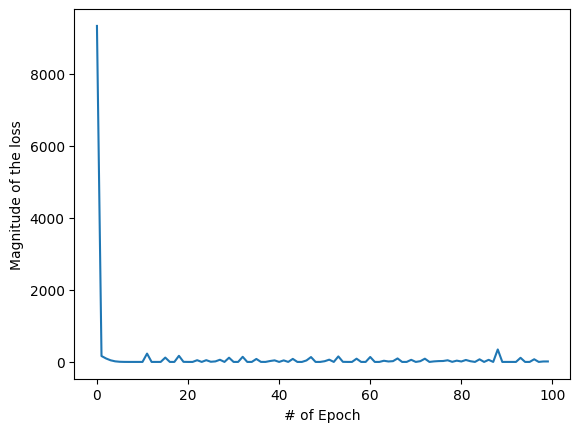

In [47]:
import matplotlib.pyplot as plt

plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the loss')
plt.plot(training.history['loss'])

In [78]:
# Ideally, the magnitude of the loss should decrease gradually to indicate that the model is learning. The plot above looks rather erratics or unusual. A few way to tweak around:
## 1. Lower the learning rate

model.compile(
    optimizer=keras.optimizers.Adam(.01),
    loss='mean_squared_error'
)

In [4]:
## 2. Data Normalization of the Input Feature (X). There are 5 methods for data normalization in general, Z-Score normalization is most suitable in this case, because:
### - Gradient Descent Optimization: The input features (Celsius values) and target values (Fahrenheit values) are on different scales, making the gradients during training vary widely. This can lead to slow convergence or unstable training. Z-Score normalization scales the input features (Celsius) to have a mean of 0 and standard deviation of 1, making the optimization process more efficient
### - Improved Model Performance: Without normalization, the model might give undue importance to features with larger scales, even if they are not actually more important. Z-score normalization ensures that all features contribute equally to the learning process, improving the model’s ability to learn the relationship between Celsius and Fahrenheit.
### - Handling Outliers: If your dataset has outliers (e.g., extremely high or low temperatures), they can distort the scaling in some other normalization methods like Min-Max normalization. Z-score normalization is less sensitive to outliers because it uses the mean and standard deviation, which are more robust to extreme values.

X_norm = (X - X.mean()) / (X.std())

In [52]:
training = model.fit(X_norm, y, epochs=100)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 6750573.5000
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 6616471.5000
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 6643791.0000
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 6673323.0000
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 6570517.5000
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 6574869.0000
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 6540209.5000
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 6501919.5000
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 6427481.5000
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 6469391.0000
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 6382110.0000
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 6355829.5000
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 6292643.5000
Epoch 14

In [85]:
# The loss is still very high. Let's increase the epochs to 1000
training = model.fit(X_norm, y, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 6882958.5000
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 6549046.0000
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 6233909.0000
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 5849745.0000
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 5582268.5000
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 5251673.0000
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 5011281.0000
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 4772857.5000
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 4409048.0000
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 4136515.7500
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 3980337.7500
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 3715429.5000
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 3498722.

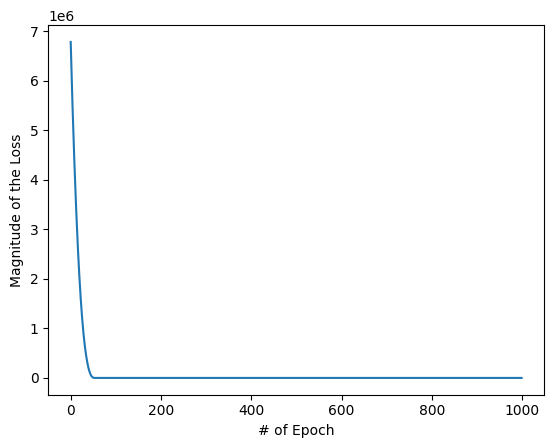

In [86]:
plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the Loss')
plt.plot(training.history['loss'])

In [5]:
# Awesome, the model is now learning.

# If the plot still shows erratic data, consider adding more layer to the neurons since the current on is too simple with only one dense layer:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(.01),
    loss='mean_squared_error'
)

In [6]:
training = model.fit(X_norm, y, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 5749928.5000
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 161427.6562
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1626.3831
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 716.3245
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 343.5966
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 173.3090
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 80.1056
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 39.8507
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 21.3830
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 11.0081
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 5.1092
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 2.4998
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.2371
Epoch 14/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 444

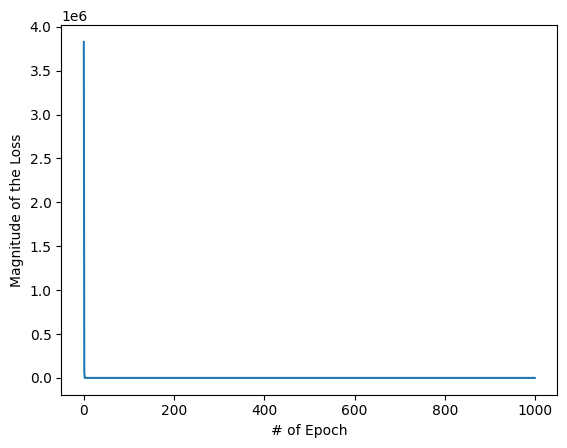

In [8]:
import matplotlib.pyplot as plt

plt.xlabel('# of Epoch')
plt.ylabel('Magnitude of the Loss')
plt.plot(training.history['loss'])

In [9]:
# Prediction
import numpy as np

c = 10

# Since we normalized the data of Input features, we have to normalize the value to predict before passing it to the model to predict
# Previously, we use Z-Score normalization, we need to be consistent
mean_X = X.mean()
std_X = X.std()

c_norm = (c - mean_X) / std_X
print(f"\nMean X: {mean_X}, STD X: {std_X};\nc: {c}, c_norm: {c_norm}")

predictions = model.predict(np.array([c_norm]).reshape(-1,1))
# print(predictions)  # Output: [[49.999756]]

print(f"\nPrediction: {c} Celsius is {predictions[0][0]} fahrenheit.")


Mean X: 1254.7360625, STD X: 726.3155691739618;
c: 10, c_norm: -1.7137675623773803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Prediction: 10 Celsius is 49.9984016418457 fahrenheit.


In [10]:
print(model.layers[0].get_weights())

[array([[ 4.818166  ,  4.693299  , -0.01640718,  4.7085376 ,  4.664309  ,
         4.803483  , -0.04535257,  4.822857  ,  0.04506151,  0.00514923,
         4.6917195 , -0.00591549,  4.828132  ,  0.04131148,  4.803861  ,
         0.04461243, -0.04910201, -0.0299317 ,  4.82176   ,  4.716684  ,
         4.8255997 ,  4.370035  ,  0.04380263, -0.03963873, -0.00595141,
         0.05020755,  0.03477455, -0.02374796,  4.6922455 ,  4.564977  ,
         4.5398636 ,  0.01794195,  4.8427505 ,  4.800614  , -0.04100756,
         4.8411794 ,  4.1648273 ,  4.815691  ,  4.4253807 , -0.02881548,
         4.6468253 ,  4.806226  ,  0.02748579,  4.389429  ,  0.03823841,
         4.550401  ,  0.03136538,  0.04515674, -0.04569146,  4.709915  ,
         4.671384  ,  4.8121963 ,  4.47507   ,  4.820704  , -0.05406025,
         4.820887  ,  4.31423   ,  4.641336  ,  4.675493  ,  4.813459  ,
        -0.0486964 ,  4.7403984 , -0.00561369, -0.01123713]],
      dtype=float32), array([ 8.323545  ,  8.107834  , -0.180

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

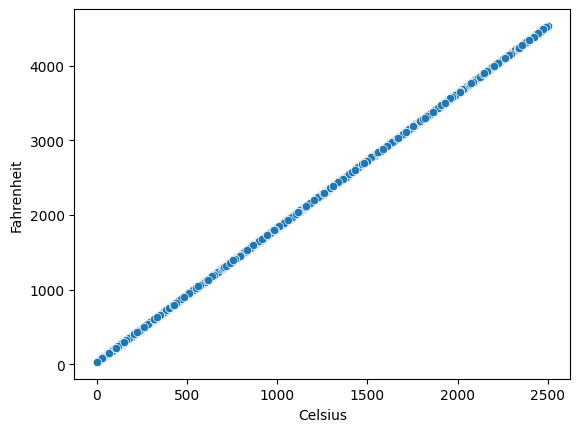

In [73]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x='Celsius',
    y='Fahrenheit'
)